In [1]:
# Load specific forecasting and evaluation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy


                     RMS_Value
time                          
2019-11-28 07:00:00   0.984083
2019-11-28 07:01:00   1.246701
2019-11-28 07:02:00   1.004492
2019-11-28 07:03:00   0.979750
2019-11-28 07:04:00   0.886278
2019-11-28 07:05:00   0.905190
2019-11-28 07:06:00   0.959868
2019-11-28 07:07:00   0.948778
2019-11-28 07:08:00   0.988192
2019-11-28 07:09:00   0.951107
2019-11-28 07:10:00   0.927097
2019-11-28 07:11:00   0.923010
2019-11-28 07:12:00   0.962012
2019-11-28 07:13:00   0.948916
2019-11-28 07:14:00   0.865217
2019-11-28 07:15:00   0.963713
2019-11-28 07:16:00   0.915931
2019-11-28 07:17:00   0.922979
2019-11-28 07:18:00   0.935591
2019-11-28 07:19:00   0.933210


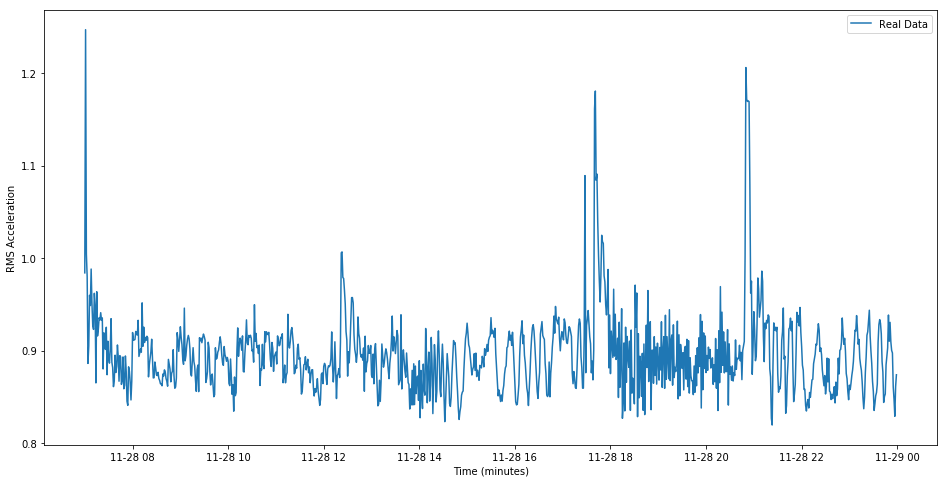

In [2]:
# Multiple out of sample forecast
# Load the data 
df = pd.read_excel('TestData1DFull_1m.xls', header=0, index_col=0, parse_dates= True)
# display first few rows
print(df.head(20))
# line plot of dataset
plt.figure(figsize=(16,8))
plt.plot(df['RMS_Value'], label = 'Real Data')
plt.ylabel('RMS Acceleration')
plt.xlabel('Time (minutes)')
plt.legend(loc='best')
plt.show()

In [3]:
#split the dataset
split_point = len(df) - 60
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', index=False) 
validation.to_excel('validation.xlsx', index=False)

Dataset 960, Validation 60


In [4]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)


In [5]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


In [6]:
# Load the data
X = dataset.values
minutes_in_hour = 60
differenced = difference(X, minutes_in_hour)


In [7]:
# fit model
model = ARIMA(differenced, order=(2,0,2))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  900
Model:                     ARMA(2, 2)   Log Likelihood                1551.924
Method:                       css-mle   S.D. of innovations              0.043
Date:                Tue, 25 Feb 2020   AIC                          -3091.849
Time:                        11:11:36   BIC                          -3063.034
Sample:                             0   HQIC                         -3080.841
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.005     -0.544      0.587      -0.013       0.007
ar.L1.y        0.3804      0.143      2.658      0.008       0.100       0.661
ar.L2.y        0.2590      0.119      2.180      0.0

In [11]:
# multi-step out-of-sample forecast
forecast, SE, Interval = model_fit.forecast(steps=60)

In [12]:
# invert the differenced forecast to something usable
history = [x for x in X]
minute = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, minutes_in_hour)
	print('Minute %d: %f' % (minute, inverted))
	history.append(inverted)
	minute += 1


Minute 1: 0.843685
Minute 2: 0.839614
Minute 3: 0.845249
Minute 4: 0.832586
Minute 5: 0.838946
Minute 6: 0.825908
Minute 7: 0.823053
Minute 8: 0.834241
Minute 9: 0.839604
Minute 10: 0.831695
Minute 11: 0.849419
Minute 12: 0.844972
Minute 13: 0.855142
Minute 14: 0.864647
Minute 15: 0.865406
Minute 16: 0.882569
Minute 17: 0.888133
Minute 18: 0.893081
Minute 19: 0.904073
Minute 20: 0.903310
Minute 21: 0.915727
Minute 22: 0.926122
Minute 23: 0.919178
Minute 24: 0.896307
Minute 25: 0.900192
Minute 26: 0.892857
Minute 27: 0.876235
Minute 28: 0.867615
Minute 29: 0.859278
Minute 30: 0.870282
Minute 31: 0.850423
Minute 32: 0.858429
Minute 33: 0.889126
Minute 34: 0.863429
Minute 35: 0.888390
Minute 36: 0.853462
Minute 37: 0.852373
Minute 38: 0.844400
Minute 39: 0.850055
Minute 40: 0.845303
Minute 41: 0.851047
Minute 42: 0.858251
Minute 43: 0.840730
Minute 44: 0.863192
Minute 45: 0.848564
Minute 46: 0.855673
Minute 47: 0.889092
Minute 48: 0.872065
Minute 49: 0.897629
Minute 50: 0.898489
Minute 51

In [13]:
# convert forecast to a dataframe
dfResults = pd.DataFrame(history)
print (dfResults)



             0
0     0.984083
1     1.246701
2     1.004492
3     0.979750
4     0.886278
5     0.905190
6     0.959868
7     0.948778
8     0.988192
9     0.951107
10    0.927097
11    0.923010
12    0.962012
13    0.948916
14    0.865217
15    0.963713
16    0.915931
17    0.922979
18    0.935591
19    0.933210
20    0.941054
21    0.932782
22    0.935456
23    0.880312
24    0.919264
25    0.904525
26    0.901409
27    0.925333
28    0.874059
29    0.910226
...        ...
990   0.850423
991   0.858429
992   0.889126
993   0.863429
994   0.888390
995   0.853462
996   0.852373
997   0.844400
998   0.850055
999   0.845303
1000  0.851047
1001  0.858251
1002  0.840730
1003  0.863192
1004  0.848564
1005  0.855673
1006  0.889092
1007  0.872065
1008  0.897629
1009  0.898489
1010  0.906208
1011  0.932475
1012  0.915723
1013  0.904071
1014  0.910488
1015  0.896871
1016  0.872550
1017  0.866970
1018  0.853060
1019  0.844202

[1020 rows x 1 columns]


In [14]:
# extract the forecasted values from the dataset
split_point = len(dfResults) - 60
dataset2, forecast = dfResults[0:split_point], dfResults[split_point:]
print('Dataset2 %d, Forecast %d' % (len(dataset2), len(forecast)))
dataset2.to_excel('dataset2.xlsx', index=False) 
forecast.to_excel('forecast.xlsx', index=False)



Dataset2 960, Forecast 60


In [30]:
# reset index of the forecast to 0 
forecast.reset_index(drop=True, inplace=True)
forecast.head()


,0
0,0.843685
1,0.839614
2,0.845249
3,0.832586
4,0.838946


In [31]:
# reset index of the validate to 0 
validation.reset_index(drop=True, inplace=True)
validation.head()

,RMS_Value
0,0.862791
1,0.858081
2,0.865041
3,0.873206
4,0.879244


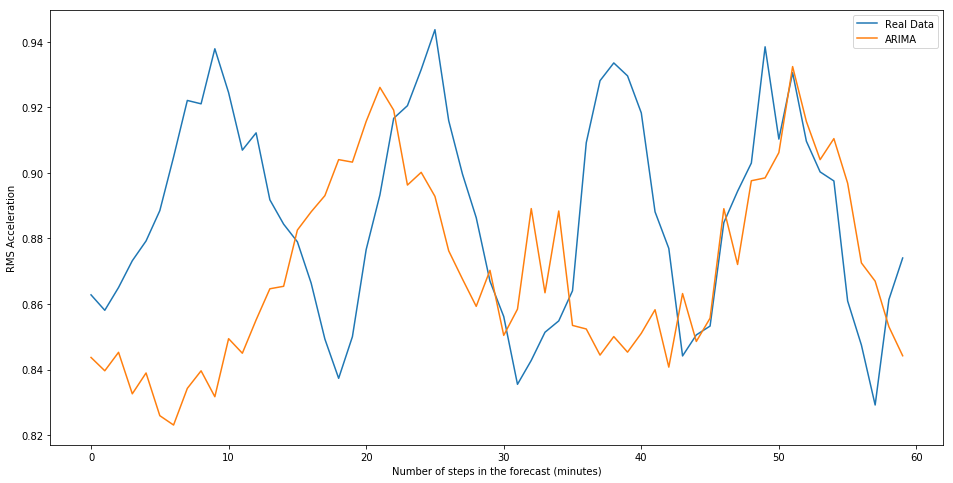

In [105]:
# plot forecasted values and test values only
plt.figure(figsize=(16,8))
plt.plot(validation['RMS_Value'], label = 'Real Data')
plt.plot(forecast, label = 'ARIMA' )
plt.ylabel('RMS Acceleration')
plt.xlabel('Number of steps in the forecast (minutes)')
plt.legend(loc='best')
plt.show()


In [64]:
# obtain feature - rmse value
rms = sqrt(mean_squared_error(forecast, validation))
print(rms)


0.04407143923191845


Confidence intervals:


AttributeError: 'DataFrame' object has no attribute 'conf_int'

In [125]:
Interval

array([[-0.14541088,  0.02361983],
       [-0.14183369,  0.05219416],
       [-0.14419248,  0.07646533],
       [-0.14049888,  0.08943695],
       [-0.13737418,  0.0983288 ],
       [-0.13433179,  0.10417513],
       [-0.13186301,  0.10820088],
       [-0.12988515,  0.11099643],
       [-0.12835745,  0.11296714],
       [-0.1271922 ,  0.11436938],
       [-0.12631453,  0.11537476],
       [-0.12565809,  0.11609982],
       [-0.12516987,  0.11662498],
       [-0.12480811,  0.11700662],
       [-0.12454078,  0.11728464],
       [-0.12434363,  0.11748754],
       [-0.12419845,  0.11763582],
       [-0.12409164,  0.1177443 ],
       [-0.12401313,  0.11782371],
       [-0.12395545,  0.11788187],
       [-0.12391308,  0.11792449],
       [-0.12388198,  0.11795573],
       [-0.12385915,  0.11797864],
       [-0.1238424 ,  0.11799543],
       [-0.12383011,  0.11800775],
       [-0.12382109,  0.11801678],
       [-0.12381447,  0.11802341],
       [-0.12380961,  0.11802827],
       [-0.12380605,

In [17]:
# convert confidence interval to a dataframe
dfIntervalFull = pd.DataFrame(Interval)
dfIntervalFull.head()

,0,1
0,-0.145411,0.023620
1,-0.141834,0.052194
2,-0.144192,0.076465
3,-0.140499,0.089437
4,-0.137374,0.098329


In [18]:
# invert the differenced confidence interval values to something usable
history_int = [x for x in X]
minute = 1
for yhat in dfIntervalFull.iloc[:,0]:
	inverted = inverse_difference(history_int, yhat, minutes_in_hour)
	print('Minute %d: %f' % (minute, inverted))
	history_int.append(inverted)
	minute += 1

Minute 1: 0.759170
Minute 2: 0.742600
Minute 3: 0.734920
Minute 4: 0.717619
Minute 5: 0.721095
Minute 6: 0.706654
Minute 7: 0.703021
Minute 8: 0.713800
Minute 9: 0.718942
Minute 10: 0.710914
Minute 11: 0.728575
Minute 12: 0.724093
Minute 13: 0.734244
Minute 14: 0.743740
Minute 15: 0.744493
Minute 16: 0.761653
Minute 17: 0.767216
Minute 18: 0.772163
Minute 19: 0.783154
Minute 20: 0.782391
Minute 21: 0.794808
Minute 22: 0.805203
Minute 23: 0.798259
Minute 24: 0.775388
Minute 25: 0.779273
Minute 26: 0.771938
Minute 27: 0.755316
Minute 28: 0.746696
Minute 29: 0.738359
Minute 30: 0.749363
Minute 31: 0.729504
Minute 32: 0.737510
Minute 33: 0.768207
Minute 34: 0.742510
Minute 35: 0.767471
Minute 36: 0.732543
Minute 37: 0.731454
Minute 38: 0.723481
Minute 39: 0.729137
Minute 40: 0.724384
Minute 41: 0.730128
Minute 42: 0.737332
Minute 43: 0.719811
Minute 44: 0.742273
Minute 45: 0.727646
Minute 46: 0.734754
Minute 47: 0.768173
Minute 48: 0.751146
Minute 49: 0.776710
Minute 50: 0.777570
Minute 51

In [19]:
# convert confidence interval to a dataframe
dfInterval = pd.DataFrame(history_int)
print (dfInterval)


             0
0     0.984083
1     1.246701
2     1.004492
3     0.979750
4     0.886278
5     0.905190
6     0.959868
7     0.948778
8     0.988192
9     0.951107
10    0.927097
11    0.923010
12    0.962012
13    0.948916
14    0.865217
15    0.963713
16    0.915931
17    0.922979
18    0.935591
19    0.933210
20    0.941054
21    0.932782
22    0.935456
23    0.880312
24    0.919264
25    0.904525
26    0.901409
27    0.925333
28    0.874059
29    0.910226
...        ...
990   0.729504
991   0.737510
992   0.768207
993   0.742510
994   0.767471
995   0.732543
996   0.731454
997   0.723481
998   0.729137
999   0.724384
1000  0.730128
1001  0.737332
1002  0.719811
1003  0.742273
1004  0.727646
1005  0.734754
1006  0.768173
1007  0.751146
1008  0.776710
1009  0.777570
1010  0.785289
1011  0.811556
1012  0.794804
1013  0.783152
1014  0.789569
1015  0.775952
1016  0.751631
1017  0.746051
1018  0.732142
1019  0.723283

[1020 rows x 1 columns]


In [20]:
# Extract the lower interval 
split_point = len(dfInterval) - 60
dataset3, lowInterval = dfInterval[0:split_point], dfInterval[split_point:]
print('Dataset3 %d, LowInterval %d' % (len(dataset3), len(lowInterval)))
dataset3.to_excel('dataset2.xlsx', index=False) 
lowInterval.to_excel('lowInterval.xlsx', index=False)

Dataset3 960, LowInterval 60


In [29]:
# reset index of the validate to 0 
lowInterval.reset_index(drop=True, inplace=True)
lowInterval.head()



,0
0,0.759170
1,0.742600
2,0.734920
3,0.717619
4,0.721095


In [22]:
# invert the differenced confidence interval values to something usable
history_int_Up = [x for x in X]
minute = 1
for yhat in dfIntervalFull.iloc[:,1]:
	inverted = inverse_difference(history_int_Up, yhat, minutes_in_hour)
	print('Minute %d: %f' % (minute, inverted))
	history_int_Up.append(inverted)
	minute += 1



Minute 1: 0.928201
Minute 2: 0.936628
Minute 3: 0.955578
Minute 4: 0.947554
Minute 5: 0.956798
Minute 6: 0.945161
Minute 7: 0.943085
Minute 8: 0.954681
Minute 9: 0.960266
Minute 10: 0.952475
Minute 11: 0.970264
Minute 12: 0.965851
Minute 13: 0.976039
Minute 14: 0.985554
Minute 15: 0.986319
Minute 16: 1.003484
Minute 17: 1.009050
Minute 18: 1.013999
Minute 19: 1.024991
Minute 20: 1.024229
Minute 21: 1.036646
Minute 22: 1.047041
Minute 23: 1.040097
Minute 24: 1.017226
Minute 25: 1.021111
Minute 26: 1.013776
Minute 27: 0.997154
Minute 28: 0.988534
Minute 29: 0.980197
Minute 30: 0.991201
Minute 31: 0.971342
Minute 32: 0.979348
Minute 33: 1.010045
Minute 34: 0.984348
Minute 35: 1.009309
Minute 36: 0.974381
Minute 37: 0.973292
Minute 38: 0.965319
Minute 39: 0.970974
Minute 40: 0.966222
Minute 41: 0.971966
Minute 42: 0.979169
Minute 43: 0.961649
Minute 44: 0.984111
Minute 45: 0.969483
Minute 46: 0.976592
Minute 47: 1.010011
Minute 48: 0.992984
Minute 49: 1.018548
Minute 50: 1.019408
Minute 51

In [23]:
# convert confidence interval, upper level, to a dataframe
dfIntervalUp = pd.DataFrame(history_int_Up)
print (dfIntervalUp)


             0
0     0.984083
1     1.246701
2     1.004492
3     0.979750
4     0.886278
5     0.905190
6     0.959868
7     0.948778
8     0.988192
9     0.951107
10    0.927097
11    0.923010
12    0.962012
13    0.948916
14    0.865217
15    0.963713
16    0.915931
17    0.922979
18    0.935591
19    0.933210
20    0.941054
21    0.932782
22    0.935456
23    0.880312
24    0.919264
25    0.904525
26    0.901409
27    0.925333
28    0.874059
29    0.910226
...        ...
990   0.971342
991   0.979348
992   1.010045
993   0.984348
994   1.009309
995   0.974381
996   0.973292
997   0.965319
998   0.970974
999   0.966222
1000  0.971966
1001  0.979169
1002  0.961649
1003  0.984111
1004  0.969483
1005  0.976592
1006  1.010011
1007  0.992984
1008  1.018548
1009  1.019408
1010  1.027127
1011  1.053394
1012  1.036642
1013  1.024990
1014  1.031407
1015  1.017790
1016  0.993468
1017  0.987889
1018  0.973979
1019  0.965121

[1020 rows x 1 columns]


In [24]:
# Extract the upper interval 
split_point = len(dfInterval) - 60
dataset4, upInterval = dfIntervalUp[0:split_point], dfIntervalUp[split_point:]
print('Dataset3 %d, LowInterval %d' % (len(dataset4), len(upInterval)))
dataset4.to_excel('dataset2.xlsx', index=False) 
upInterval.to_excel('upInterval.xlsx', index=False)


Dataset3 960, LowInterval 60


In [28]:
# reset index of the upper Interval to 0 
upInterval.reset_index(drop=True, inplace=True)
upInterval.head()

,0
0,0.928201
1,0.936628
2,0.955578
3,0.947554
4,0.956798


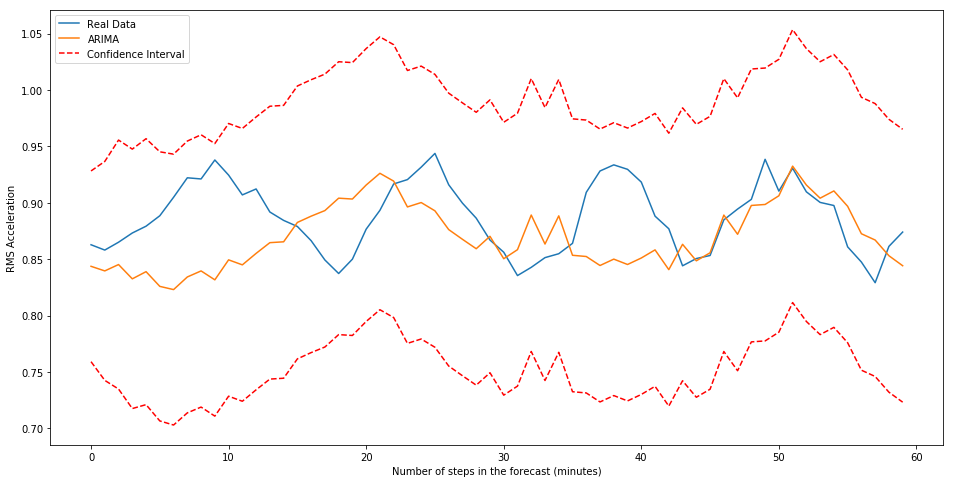

In [32]:
plt.figure(figsize=(16,8))
plt.plot(validation['RMS_Value'], label = 'Real Data')
plt.plot(forecast, label = 'ARIMA' )
plt.plot(lowInterval, label = 'Confidence Interval', ls='--',c='r')
plt.plot(upInterval, ls='--',c='r') 
plt.ylabel('RMS Acceleration')
plt.xlabel('Number of steps in the forecast (minutes)')
plt.legend(loc='best')
plt.show()


In [15]:
df.reset_index(drop=True, inplace=True)
df.head()

,RMS_Value
0,0.984083
1,1.246701
2,1.004492
3,0.979750
4,0.886278


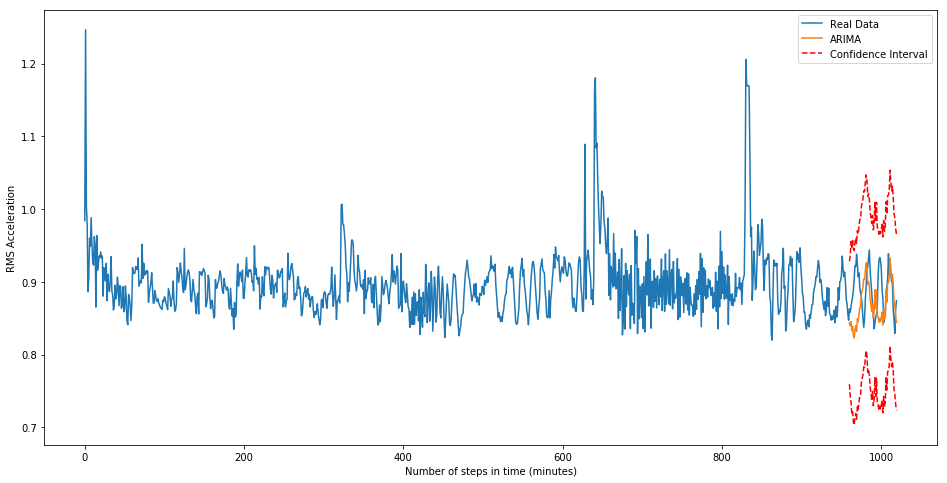

In [27]:
plt.figure(figsize=(16,8))
plt.plot(df['RMS_Value'], label = 'Real Data')
plt.plot(forecast, label = 'ARIMA' )
plt.plot(lowInterval, label = 'Confidence Interval', ls='--',c='r')
plt.plot(upInterval, ls='--',c='r') 
plt.ylabel('RMS Acceleration')
plt.xlabel('Number of steps in time (minutes)')
plt.legend(loc='best')
plt.show()


In [34]:
df2 = pd.read_excel('TestData1DFull_1m.xls', header=0, index_col=0, parse_dates= True)
df2.tail()

,RMS_Value
time,
2019-11-28 23:55:00,0.860925
2019-11-28 23:56:00,0.847467
2019-11-28 23:57:00,0.829168
2019-11-28 23:58:00,0.861352
2019-11-28 23:59:00,0.874040
